In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('june_stringIndexer.csv')

In [3]:
df = df.drop(['Vehicle Year', 'Intersecting Street', 'Unnamed: 0'], axis =1)

In [4]:
df

,Violation Code,Violation Location,House Number,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,63,1.0,109,35,70,83,1298,4,2376,58
1,63,1.0,109,39,75,96,1250,4,2376,-1
2,63,1.0,109,35,70,72,1280,4,2376,26
3,63,1.0,109,35,-1,83,1246,4,2376,-1
4,63,1.0,109,35,-1,72,1268,4,2376,26
...,...,...,...,...,...,...,...,...,...,...
48481,40,75.0,598,23,1,110,293,2,2567,18
48482,20,75.0,1285,13,1,7,106,2,949,130
48483,40,75.0,1152,39,75,110,280,2,1261,124
48484,53,75.0,590,44,70,121,762,2,1354,65


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [6]:
x = df.drop('Violation Code', axis=1)
x.columns

Index(['Violation Location', 'House Number', 'Registration State',
       'Vehicle Body Type', 'Vehicle Make', 'Violation Time',
       'Violation County', 'Street Name', 'Vehicle Color'],
      dtype='object')

In [7]:
"""
x = df[['Violation Location', 'Registration State',
        'Vehicle Body Type', 'Vehicle Make', 'Violation Time',
        'Violation County', 'Street Name', 'Vehicle Color']]
"""
x = df[['Violation Location',
        'Violation Time',
        'Street Name']]

In [8]:
x = x.fillna(0)

In [9]:
y = df['Violation Code']

In [10]:
y.unique()

array([63, 65, 14, 70, 46, 20, 40, 48, 17, 74, 84, 16, 71, 31, 69, 81, 10,
       38, 21, 19, 42, 51, 53, 75, 67, 72, 37, 82, 68, 98, 76, 24, 41, 11,
       33, 35, 99, 50, 62, 60, 18, 83, 66, 91, 27, 78, 95, 47, 61, 79, 39,
        6, 85, 90, 73, 13, 22, 80, 96,  4, 87, 89, 26, 77, 52, 45, 49, 97,
       23,  9, 58, 34, 44, 64,  8, 57])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.2,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(38788, 3) (38788,)
(9698, 3) (9698,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [13]:
transformer = FeatureUnion(
    transformer_list=[
         ('features', SimpleImputer(strategy='mean')),
         ('indicators', MissingIndicator())])
transformer = transformer.fit(X_train, Y_train)
results = transformer.transform(X_test)
results.shape

(9698, 3)

In [14]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, Y_train)
results = clf.predict(X_test)
results.shape

(9698,)

In [15]:
dec_tree_score = f1_score(Y_test, results, average=None)

In [16]:
dec_tree_score

array([0.        , 0.32      , 0.        , 0.44262295, 0.28571429,
       0.35294118, 0.49703362, 0.52550232, 0.41509434, 0.35294118,
       0.36363636, 0.56577416, 0.77539925, 0.25      , 0.47058824,
       1.        , 0.2       , 0.48351648, 0.        , 0.3026087 ,
       0.45962733, 0.        , 0.29570201, 0.21621622, 0.23529412,
       1.        , 0.4       , 0.37140855, 0.60176991, 0.35121951,
       0.        , 0.11764706, 0.32768362, 0.32876712, 0.22222222,
       0.14285714, 0.28571429, 0.66666667, 0.        , 0.27272727,
       0.1025641 , 0.66165414, 0.48430493, 0.14130435, 0.17886179,
       0.        , 0.2       , 0.17725753, 0.        , 0.28571429,
       0.        , 0.24175824, 0.        , 0.        , 0.2       ,
       0.        , 0.21978022, 0.15384615, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.24370861, 0.26086957])

In [17]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':results})
print("Test R-squared: ",round(metrics.r2_score(Y_test,results),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,results),2))
dframe

Test R-squared:  -0.21
Test Explained Variation:  -0.2


,Actual,Predict
26100,20,19
3085,98,46
33358,70,40
17599,98,20
30937,38,38
...,...,...
47557,14,14
46605,37,16
26725,20,19
17324,18,17


In [18]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, Y_train)

In [19]:
dec_tree_pred = dec_tree.predict(X_test)

dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)

In [20]:
dec_tree_pred



array([19, 46, 40, ..., 19, 17, 37])

In [21]:
dec_tree_score

array([0.        , 0.41666667, 0.        , 0.44262295, 0.25      ,
       0.4       , 0.49445532, 0.52615385, 0.43269231, 0.35294118,
       0.36149733, 0.56927536, 0.77650236, 0.25      , 0.44444444,
       1.        , 0.2       , 0.48066298, 0.        , 0.30208333,
       0.46263684, 0.        , 0.29384437, 0.2       , 0.23529412,
       1.        , 0.33333333, 0.37042254, 0.60176991, 0.35175879,
       0.        , 0.12903226, 0.34285714, 0.33333333, 0.25      ,
       0.15384615, 0.28571429, 0.66666667, 0.        , 0.27272727,
       0.10810811, 0.68656716, 0.48430493, 0.13907285, 0.18436874,
       0.        , 0.21052632, 0.17200675, 0.        , 0.28571429,
       0.        , 0.24175824, 0.        , 0.        , 0.2       ,
       0.        , 0.2173913 , 0.16666667, 0.        , 1.        ,
       0.        , 0.        , 0.2550882 , 0.24      ])

In [22]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':dec_tree_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, dec_tree_pred))
dframe

Accuracy score 0.43534749432872755


,Actual,Predict
26100,20,19
3085,98,46
33358,70,40
17599,98,20
30937,38,38
...,...,...
47557,14,14
46605,37,14
26725,20,19
17324,18,17


In [23]:
dec_tree.score(X_train, Y_train)

0.9646797978756316

In [24]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, max_iter=300))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=300, random_state=0))])

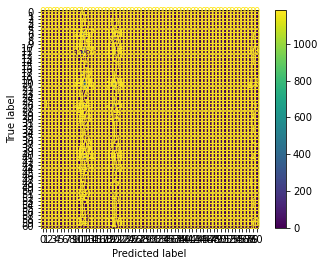

In [27]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)



In [29]:
y_score.shape

(9698, 76)

In [31]:
df

,Violation Code,Violation Location,House Number,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,63,1.0,109,35,70,83,1298,4,2376,58
1,63,1.0,109,39,75,96,1250,4,2376,-1
2,63,1.0,109,35,70,72,1280,4,2376,26
3,63,1.0,109,35,-1,83,1246,4,2376,-1
4,63,1.0,109,35,-1,72,1268,4,2376,26
...,...,...,...,...,...,...,...,...,...,...
48481,40,75.0,598,23,1,110,293,2,2567,18
48482,20,75.0,1285,13,1,7,106,2,949,130
48483,40,75.0,1152,39,75,110,280,2,1261,124
48484,53,75.0,590,44,70,121,762,2,1354,65


In [32]:
ViolationCode = df["Violation Code"]
ViolationCode.unique()
len(ViolationCode.unique())

76

In [33]:
a = ViolationCode.unique()

In [34]:
type(a)

numpy.ndarray

In [35]:
df

,Violation Code,Violation Location,House Number,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,63,1.0,109,35,70,83,1298,4,2376,58
1,63,1.0,109,39,75,96,1250,4,2376,-1
2,63,1.0,109,35,70,72,1280,4,2376,26
3,63,1.0,109,35,-1,83,1246,4,2376,-1
4,63,1.0,109,35,-1,72,1268,4,2376,26
...,...,...,...,...,...,...,...,...,...,...
48481,40,75.0,598,23,1,110,293,2,2567,18
48482,20,75.0,1285,13,1,7,106,2,949,130
48483,40,75.0,1152,39,75,110,280,2,1261,124
48484,53,75.0,590,44,70,121,762,2,1354,65


In [36]:
df_max_scaled = df.copy()
  
# apply normalization techniques on Column 1
columns = ['Violation Code', "Violation Location", "Registration State", "Vehicle Body Type", 
          "Vehicle Make", "Violation Time", "Violation County", "Street Name", "Vehicle Color"]
for i in columns:
    #print(i)
    df_max_scaled[i] = df_max_scaled[i] / df_max_scaled[i].abs().max()
  
# view normalized data
display(df_max_scaled)

,Violation Code,Violation Location,House Number,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,0.636364,0.001239,109,0.603448,0.636364,0.421320,0.861314,0.571429,0.818182,0.402778
1,0.636364,0.001239,109,0.672414,0.681818,0.487310,0.829463,0.571429,0.818182,-0.006944
2,0.636364,0.001239,109,0.603448,0.636364,0.365482,0.849370,0.571429,0.818182,0.180556
3,0.636364,0.001239,109,0.603448,-0.009091,0.421320,0.826808,0.571429,0.818182,-0.006944
4,0.636364,0.001239,109,0.603448,-0.009091,0.365482,0.841407,0.571429,0.818182,0.180556
...,...,...,...,...,...,...,...,...,...,...
48481,0.404040,0.092937,598,0.396552,0.009091,0.558376,0.194426,0.285714,0.883953,0.125000
48482,0.202020,0.092937,1285,0.224138,0.009091,0.035533,0.070338,0.285714,0.326791,0.902778
48483,0.404040,0.092937,1152,0.672414,0.681818,0.558376,0.185800,0.285714,0.434229,0.861111
48484,0.535354,0.092937,590,0.758621,0.636364,0.614213,0.505640,0.285714,0.466253,0.451389


In [37]:
df_max_scaled = df_max_scaled.drop(["House Number"], axis = 1)

In [38]:
df_max_scaled = df_max_scaled.fillna(0)

[[0.35478729 0.06009529 0.62450954 0.79563493 0.37685081 0.76097789
  0.59714125 0.47480611 0.82844075]
 [0.38496829 0.06934675 0.62332773 0.71210392 0.32925504 0.19985205
  0.38317526 0.55455411 0.23582656]
 [0.36071415 0.07631146 0.62485601 0.01909754 0.46358511 0.72646546
  0.34206255 0.56741971 0.23906224]
 [0.34145505 0.07487014 0.63349024 0.68042278 0.81280165 0.57894352
  0.37644241 0.54730871 0.27431387]
 [0.30687685 0.06906341 0.62374608 0.70685797 0.28763951 0.7743538
  0.38814334 0.57744061 0.19981645]
 [0.36947713 0.06600294 0.60736659 0.05180464 0.40863467 0.70819627
  0.41413844 0.53388422 0.82843802]
 [0.42922957 0.07126024 0.61118887 0.69914794 0.40470527 0.71286044
  0.07917765 0.63589738 0.72779315]
 [0.39678341 0.06248135 0.61964861 0.7787375  0.39388686 0.18753438
  0.47991999 0.52366594 0.841914  ]
 [0.42065144 0.07186575 0.62411683 0.0287478  0.44697606 0.18305494
  0.41841972 0.53396557 0.45700092]
 [0.8427698  0.09709965 0.61324506 0.67608915 0.42024938 0.573224

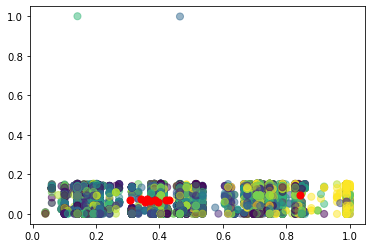

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(df_max_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_max_scaled['Violation Code'], df_max_scaled["Violation Location"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [41]:
df_max_scaled

,Violation Code,Violation Location,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,0.636364,0.001239,0.603448,0.636364,0.421320,0.861314,0.571429,0.818182,0.402778
1,0.636364,0.001239,0.672414,0.681818,0.487310,0.829463,0.571429,0.818182,-0.006944
2,0.636364,0.001239,0.603448,0.636364,0.365482,0.849370,0.571429,0.818182,0.180556
3,0.636364,0.001239,0.603448,-0.009091,0.421320,0.826808,0.571429,0.818182,-0.006944
4,0.636364,0.001239,0.603448,-0.009091,0.365482,0.841407,0.571429,0.818182,0.180556
...,...,...,...,...,...,...,...,...,...
48481,0.404040,0.092937,0.396552,0.009091,0.558376,0.194426,0.285714,0.883953,0.125000
48482,0.202020,0.092937,0.224138,0.009091,0.035533,0.070338,0.285714,0.326791,0.902778
48483,0.404040,0.092937,0.672414,0.681818,0.558376,0.185800,0.285714,0.434229,0.861111
48484,0.535354,0.092937,0.758621,0.636364,0.614213,0.505640,0.285714,0.466253,0.451389


In [42]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_max_scaled)

In [43]:
segmentation_std

array([[ 1.02089656, -1.51440403, -0.11071402, ...,  0.62897016,
         1.09279741, -0.24493384],
       [ 1.02089656, -1.51440403,  0.31610318, ...,  0.62897016,
         1.09279741, -1.52377048],
       [ 1.02089656, -1.51440403, -0.11071402, ...,  0.62897016,
         1.09279741, -0.93854015],
       ...,
       [ 0.0197953 ,  0.48204706,  0.31610318, ..., -0.41091688,
        -0.3874987 ,  1.18562917],
       [ 0.58563514,  0.48204706,  0.84962467, ..., -0.41091688,
        -0.26403006, -0.09320746],
       [ 0.58563514,  0.48204706, -2.45820859, ..., -0.41091688,
        -0.26403006, -0.93854015]])

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [45]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [46]:
pca.explained_variance_ratio_

array([0.13912147, 0.13638191, 0.11917686, 0.11213289, 0.10965081,
       0.1052376 , 0.10131581, 0.0994728 , 0.07750985])

Text(0, 0.5, 'Cumulative Explained Variance')

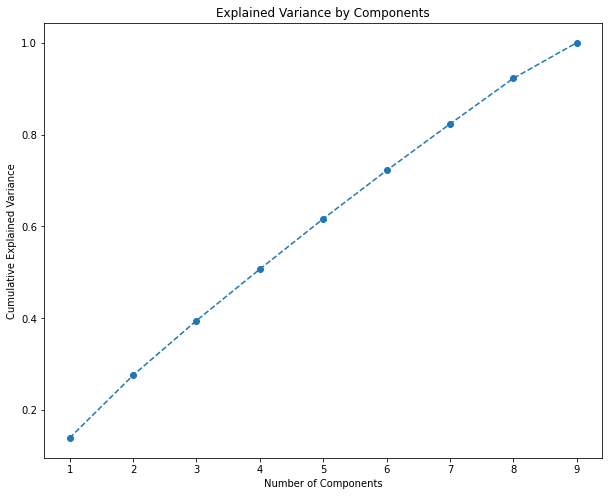

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [48]:
pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [49]:
pca.transform(segmentation_std)

array([[-0.73735928, -0.46426495,  0.08094857],
       [-0.01926195, -0.66618494,  0.07939199],
       [-0.47504838, -0.56900424,  0.27337449],
       ...,
       [-0.27651049,  0.74476097,  0.14344671],
       [ 0.66230112,  0.38536147,  0.05418275],
       [-0.17752626,  0.27861446,  2.04402732]])

In [50]:
scores_pca = pca.transform(segmentation_std)

In [51]:
wcss = []
for i in range(1, 51):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

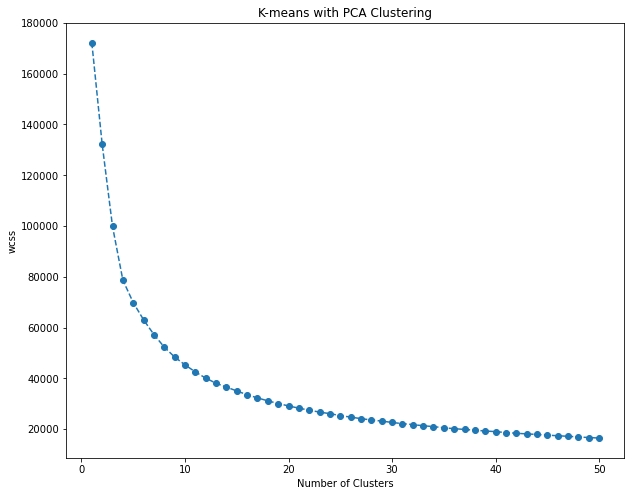

In [52]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 51), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('K-means with PCA Clustering')
plt.show()

In [53]:
kmeans_pca = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [54]:
df_segm_pca_kmeans = pd.concat([df_max_scaled.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3 :] = ['Comp 1', 'Comp 2', 'Comp 3']
df_segm_pca_kmeans['Segment K-means pca'] = kmeans_pca.labels_

In [55]:
df_segm_pca_kmeans.head()

,Violation Code,Violation Location,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Comp 1,Comp 2,Comp 3,Segment K-means pca
0,0.636364,0.001239,0.603448,0.636364,0.421320,0.861314,0.571429,0.818182,0.402778,-0.737359,-0.464265,0.080949,3
1,0.636364,0.001239,0.672414,0.681818,0.487310,0.829463,0.571429,0.818182,-0.006944,-0.019262,-0.666185,0.079392,0
2,0.636364,0.001239,0.603448,0.636364,0.365482,0.849370,0.571429,0.818182,0.180556,-0.475048,-0.569004,0.273374,0
3,0.636364,0.001239,0.603448,-0.009091,0.421320,0.826808,0.571429,0.818182,-0.006944,0.760849,-1.260190,0.317587,0
4,0.636364,0.001239,0.603448,-0.009091,0.365482,0.841407,0.571429,0.818182,0.180556,0.386652,-1.122052,0.293921,0


In [56]:
df_segm_pca_kmeans1=df_segm_pca_kmeans.drop("Violation Code", axis = 1)

In [57]:
df_segm_pca_kmeans1

,Violation Location,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Comp 1,Comp 2,Comp 3,Segment K-means pca
0,0.001239,0.603448,0.636364,0.421320,0.861314,0.571429,0.818182,0.402778,-0.737359,-0.464265,0.080949,3
1,0.001239,0.672414,0.681818,0.487310,0.829463,0.571429,0.818182,-0.006944,-0.019262,-0.666185,0.079392,0
2,0.001239,0.603448,0.636364,0.365482,0.849370,0.571429,0.818182,0.180556,-0.475048,-0.569004,0.273374,0
3,0.001239,0.603448,-0.009091,0.421320,0.826808,0.571429,0.818182,-0.006944,0.760849,-1.260190,0.317587,0
4,0.001239,0.603448,-0.009091,0.365482,0.841407,0.571429,0.818182,0.180556,0.386652,-1.122052,0.293921,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48481,0.092937,0.396552,0.009091,0.558376,0.194426,0.285714,0.883953,0.125000,1.607058,-1.255286,0.871419,0
48482,0.092937,0.224138,0.009091,0.035533,0.070338,0.285714,0.326791,0.902778,-0.706443,0.185232,1.366453,4
48483,0.092937,0.672414,0.681818,0.558376,0.185800,0.285714,0.434229,0.861111,-0.276510,0.744761,0.143447,3
48484,0.092937,0.758621,0.636364,0.614213,0.505640,0.285714,0.466253,0.451389,0.662301,0.385361,0.054183,2


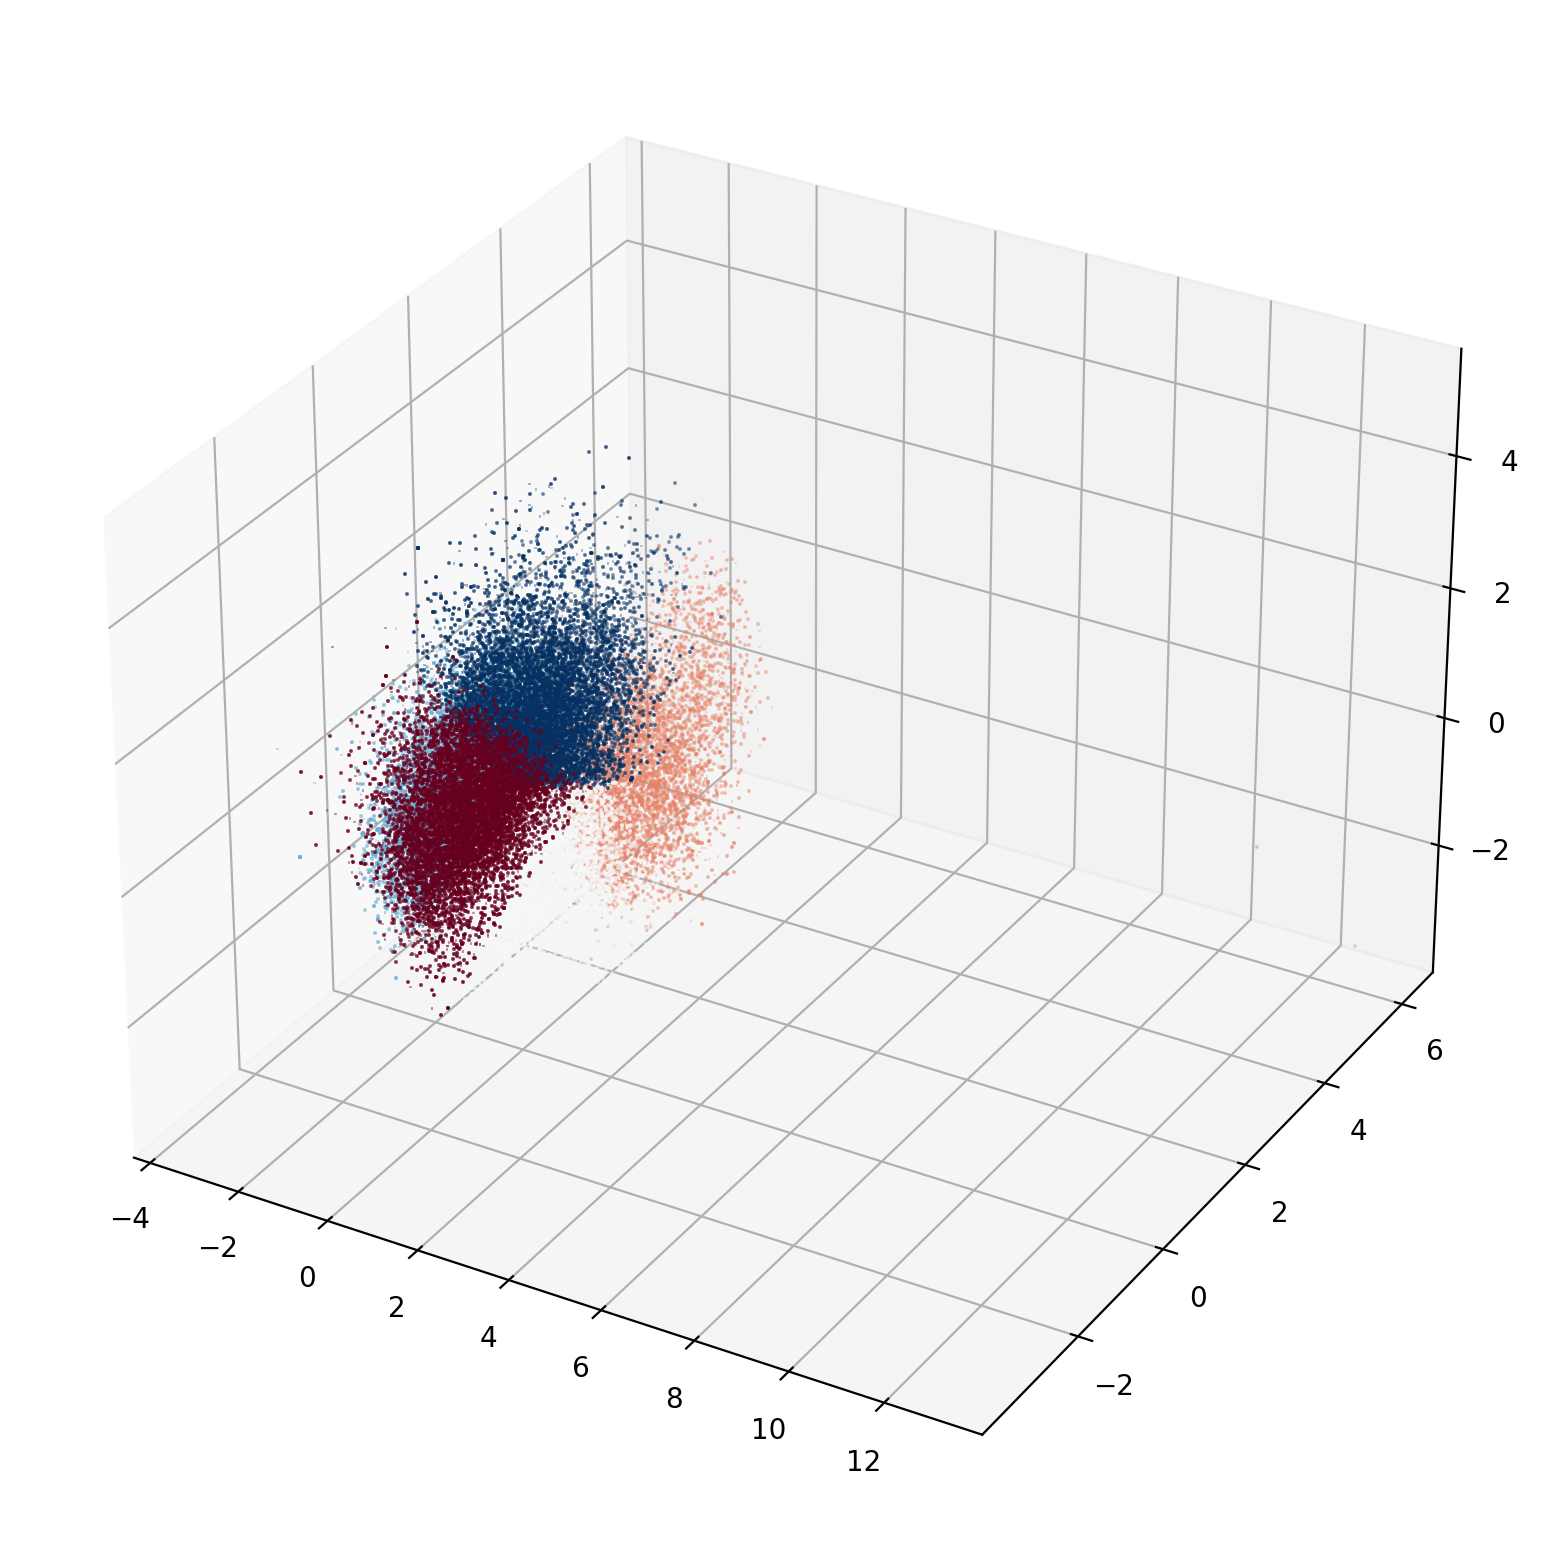

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure





fig = plt.figure(figsize=(10, 10), dpi=200)

ax = fig.add_subplot(111, projection='3d')
x = np.array(df_segm_pca_kmeans1['Comp 1'])
y = np.array(df_segm_pca_kmeans1['Comp 2'])
z = np.array(df_segm_pca_kmeans1['Comp 3'])

ax.scatter(x,y,z, marker="s", c=df_segm_pca_kmeans1['Segment K-means pca'], s=0.1, cmap="RdBu")

plt.show()

In [59]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means pca'].map({x: "Violation" + str(x) for x in range(1, 6)})

In [60]:
import seaborn as sns #, palette = ['b', 'r', 'c', 'y']

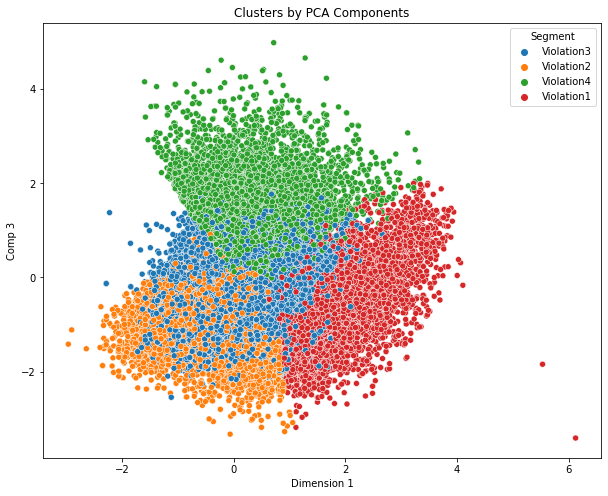

In [61]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Comp 2']
Y_axis = df_segm_pca_kmeans['Comp 3']
plt.figure(figsize = (10, 8))
ax = sns.scatterplot(data = df_segm_pca_kmeans, x = x_axis, y = Y_axis, hue = df_segm_pca_kmeans['Segment'])
ax.set(xlabel=None)
plt.title('Clusters by PCA Components')
plt.xlabel('Dimension 1')
plt.show()

In [62]:
df

,Violation Code,Violation Location,House Number,Registration State,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color
0,63,1.0,109,35,70,83,1298,4,2376,58
1,63,1.0,109,39,75,96,1250,4,2376,-1
2,63,1.0,109,35,70,72,1280,4,2376,26
3,63,1.0,109,35,-1,83,1246,4,2376,-1
4,63,1.0,109,35,-1,72,1268,4,2376,26
...,...,...,...,...,...,...,...,...,...,...
48481,40,75.0,598,23,1,110,293,2,2567,18
48482,20,75.0,1285,13,1,7,106,2,949,130
48483,40,75.0,1152,39,75,110,280,2,1261,124
48484,53,75.0,590,44,70,121,762,2,1354,65


In [63]:
type(df)

pandas.core.frame.DataFrame

In [64]:
Violation_time_df = df["Violation Time"]

In [65]:
Violation_time_df

0        1298
1        1250
2        1280
3        1246
4        1268
         ... 
48481     293
48482     106
48483     280
48484     762
48485     776
Name: Violation Time, Length: 48486, dtype: int64

In [66]:
def change_time_to_hour(x):
    return x // 100

In [67]:
Violation_time_df = Violation_time_df.apply(change_time_to_hour)

In [68]:
Violation_time_df

0        12
1        12
2        12
3        12
4        12
         ..
48481     2
48482     1
48483     2
48484     7
48485     7
Name: Violation Time, Length: 48486, dtype: int64

In [69]:
df2 = df.copy()

In [70]:
df2["Violation Time"].apply(change_time_to_hour)

0        12
1        12
2        12
3        12
4        12
         ..
48481     2
48482     1
48483     2
48484     7
48485     7
Name: Violation Time, Length: 48486, dtype: int64

In [71]:
df = df

In [72]:
df_gud = pd.read_csv('df.csv')

In [73]:
df_gud = df_gud.drop("Unnamed: 0",axis = 1)

In [74]:
df_gud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292678 entries, 0 to 292677
Data columns (total 11 columns):
 #   Column                                         Non-Null Count   Dtype
---  ------                                         --------------   -----
 0   Violation Location                             292678 non-null  int64
 1   Violation Code                                 292678 non-null  int64
 2   Vehicle Body Type                              292678 non-null  int64
 3   Vehicle Make                                   292678 non-null  int64
 4   Violation Time                                 292678 non-null  int64
 5   Violation County                               292678 non-null  int64
 6   Street Name                                    292678 non-null  int64
 7   Vehicle Color                                  292678 non-null  int64
 8   Median income (dollars); Estimate; Households  292678 non-null  int64
 9   IssueDate                                      292678 non-n

In [75]:
df_PCA_5input = df_gud.drop(["Violation Code", "Vehicle Body Type", "Vehicle Make", "Vehicle Color","IssueDate"], axis = 1)

In [76]:
df_PCA_5input

,Violation Location,Violation Time,Violation County,Street Name,Median income (dollars); Estimate; Households,VCode
0,1,1,4,3529,85032,11
1,1,13,4,3529,85032,2
2,1,13,4,3529,85032,2
3,1,13,4,3529,85032,2
4,1,13,4,3529,85032,2
...,...,...,...,...,...,...
292673,75,1,2,1755,26002,2
292674,75,1,2,1755,26002,2
292675,75,9,4,1941,26002,11
292676,75,11,2,1941,26002,11


In [77]:
df_max_scaled_5 = df_PCA_5input.copy()
  
# apply normalization techniques on Column 1
columns = ['Violation Location', "Violation Time", "Violation County", "Street Name"
         ,"Median income (dollars); Estimate; Households" ]
for i in columns:
    #print(i)
    df_max_scaled_5[i] = df_max_scaled_5[i] / df_max_scaled_5[i].abs().max()
  
# view normalized data
display(df_max_scaled_5)

,Violation Location,Violation Time,Violation County,Street Name,Median income (dollars); Estimate; Households,VCode
0,0.001242,0.066667,0.571429,0.829182,0.350439,11
1,0.001242,0.866667,0.571429,0.829182,0.350439,2
2,0.001242,0.866667,0.571429,0.829182,0.350439,2
3,0.001242,0.866667,0.571429,0.829182,0.350439,2
4,0.001242,0.866667,0.571429,0.829182,0.350439,2
...,...,...,...,...,...,...
292673,0.093168,0.066667,0.285714,0.412359,0.107161,2
292674,0.093168,0.066667,0.285714,0.412359,0.107161,2
292675,0.093168,0.600000,0.571429,0.456062,0.107161,11
292676,0.093168,0.733333,0.285714,0.456062,0.107161,11


In [78]:
df_max_scaled_5 = df_max_scaled_5.drop(["VCode", "Median income (dollars); Estimate; Households"], axis = 1)

In [80]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA



pca = PCA(n_components=3)
pca.fit(df_max_scaled_5)

PCA(n_components=3)

In [81]:
a = np.array([1, 12, 4, 3546, 85032], dtype=np.int8)

In [82]:
pca.components_

array([[ 0.00285211, -0.92271639,  0.35675341, -0.14599089],
       [ 0.01207291,  0.37399345,  0.73673076, -0.56321483],
       [-0.02380599, -0.0933087 , -0.57393259, -0.81322085]])

In [ ]:
df_segm_pca_kmeans_5 = df_segm_pca_kmeans_5[["Comp 1", "Comp 2", "Comp 3", "VCode"]]

In [ ]:
df_segm_pca_kmeans_5

In [85]:
df_segm_pca_kmeans_5.to_csv("./df_pca_no_income.csv")

In [86]:
df_gud[["Violation Time", "IssueDate"]]

,Violation Time,IssueDate
0,1,0
1,13,4
2,13,4
3,13,4
4,13,4
...,...,...
292673,1,4
292674,1,4
292675,9,1
292676,11,3


In [87]:
df_gud["Violation Location"].unique()

array([  1,   5,  79,  88,   9,  90,  84,  34,   6,   7,  14,  94, 121,
       120,  68,  76,  83,  81,  77,  78,  17,  67,  10, 122,  42,  48,
        46,  40,  44,  52,  43,  50,  47,  45,  49,  41,  73,  75,  72,
        70,  71,  13,  20,  66,  26,  19,  24,  23, 101, 123,  22,  18,
        62, 105,  60,  61,  63,  25,  28,  32,  33, 103, 113, 107, 203,
       108,  86,  69, 115, 110, 109, 106, 102, 104,  30,   4, 114, 100,
       111,  11,  29,   8, 168,  65, 116, 117,  96,  87,  56, 112, 119,
        99, 136,  16, 805,  39,  15])

In [88]:
df_max_scaled = df_gud.copy()
  
# apply normalization techniques on Column 1
columns = ["Violation Location", "Vehicle Body Type", "Vehicle Make",
           "Violation Time", "Violation County", "Street Name", "Vehicle Color", 
           "Median income (dollars); Estimate; Households", "IssueDate", "VCode"]
for i in columns:
    #print(i)
    df_max_scaled[i] = df_max_scaled[i] / df_max_scaled[i].abs().max()
  
# view normalized data
display(df_max_scaled)

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,0.001242,46,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714
1,0.001242,63,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857
2,0.001242,63,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
3,0.001242,63,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
4,0.001242,63,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,14,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857
292674,0.093168,14,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857
292675,0.093168,53,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714
292676,0.093168,53,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714


In [89]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_max_scaled)

In [90]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [91]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [92]:
pca.explained_variance_ratio_

array([0.16875345, 0.13928066, 0.10575326, 0.0938924 , 0.09000351,
       0.0882126 , 0.0862094 , 0.08263212, 0.0797929 , 0.0425405 ,
       0.02292921])

Text(0, 0.5, 'Cumulative Explained Variance')

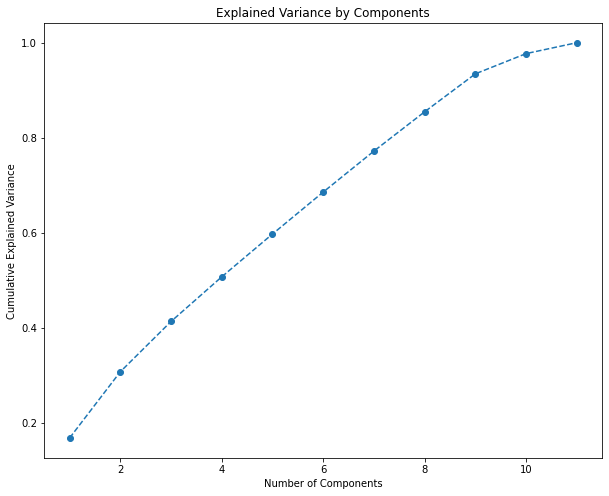

In [93]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 12), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [94]:
pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [95]:
pca.transform(segmentation_std)

array([[ 0.33886943,  1.81801443, -0.62718323],
       [-0.52910933,  0.54541038, -1.05552232],
       [-0.68311462,  0.5599306 , -0.77289947],
       ...,
       [ 1.47055421,  0.44503835, -0.35003283],
       [ 1.83797668, -0.86441682,  0.21228102],
       [ 1.82832895, -0.70002727, -0.20124939]])

In [96]:
scores_pca = pca.transform(segmentation_std)

In [97]:
kmeans_pca = KMeans(n_clusters=14, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=14, random_state=42)

In [98]:
df_max_scaled

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,0.001242,46,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714
1,0.001242,63,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857
2,0.001242,63,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
3,0.001242,63,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
4,0.001242,63,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,14,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857
292674,0.093168,14,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857
292675,0.093168,53,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714
292676,0.093168,53,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714


In [99]:
df_segm_pca_kmeans = pd.concat([df_max_scaled.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3 :] = ['Comp 1', 'Comp 2', 'Comp 3']
df_segm_pca_kmeans['Segment K-means pca'] = kmeans_pca.labels_

In [100]:
df_segm_pca_kmeans.head()

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode,Comp 1,Comp 2,Comp 3,Segment K-means pca
0,0.001242,46,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714,0.338869,1.818014,-0.627183,4
1,0.001242,63,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857,-0.529109,0.545410,-1.055522,13
2,0.001242,63,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.683115,0.559931,-0.772899,13
3,0.001242,63,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.913999,1.121206,-1.401985,4
4,0.001242,63,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857,-0.468879,0.102517,-0.201110,13


In [101]:
df_segm_pca_kmeans1=df_segm_pca_kmeans.drop("Violation Code", axis = 1)

In [102]:
df_segm_pca_kmeans1

,Violation Location,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode,Comp 1,Comp 2,Comp 3,Segment K-means pca
0,0.001242,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714,0.338869,1.818014,-0.627183,4
1,0.001242,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857,-0.529109,0.545410,-1.055522,13
2,0.001242,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.683115,0.559931,-0.772899,13
3,0.001242,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.913999,1.121206,-1.401985,4
4,0.001242,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857,-0.468879,0.102517,-0.201110,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857,-0.984167,-0.399751,-0.769544,13
292674,0.093168,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857,-0.626376,-1.244239,0.402679,3
292675,0.093168,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714,1.470554,0.445038,-0.350033,5
292676,0.093168,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714,1.837977,-0.864417,0.212281,12


In [103]:
df_pca = df_segm_pca_kmeans1[["Comp 1", "Comp 2", "Comp 3"]]

In [104]:
df_max_scaled_label = df_gud["VCode"]

In [105]:
df_pca

,Comp 1,Comp 2,Comp 3
0,0.338869,1.818014,-0.627183
1,-0.529109,0.545410,-1.055522
2,-0.683115,0.559931,-0.772899
3,-0.913999,1.121206,-1.401985
4,-0.468879,0.102517,-0.201110
...,...,...,...
292673,-0.984167,-0.399751,-0.769544
292674,-0.626376,-1.244239,0.402679
292675,1.470554,0.445038,-0.350033
292676,1.837977,-0.864417,0.212281


In [106]:
df_max_scaled_label

0         11
1          2
2          2
3          2
4          2
          ..
292673     2
292674     2
292675    11
292676    11
292677    11
Name: VCode, Length: 292678, dtype: int64

In [107]:
PCA_df = pd.concat([df_pca, df_max_scaled_label], axis=1, join="inner")

In [108]:
PCA_df

,Comp 1,Comp 2,Comp 3,VCode
0,0.338869,1.818014,-0.627183,11
1,-0.529109,0.545410,-1.055522,2
2,-0.683115,0.559931,-0.772899,2
3,-0.913999,1.121206,-1.401985,2
4,-0.468879,0.102517,-0.201110,2
...,...,...,...,...
292673,-0.984167,-0.399751,-0.769544,2
292674,-0.626376,-1.244239,0.402679,2
292675,1.470554,0.445038,-0.350033,11
292676,1.837977,-0.864417,0.212281,11


In [109]:
PCA_df.to_csv("./Data-Processing/PCA_df_VCode.csv")

In [110]:
df_segm_pca_kmeans1['Segment K-means pca'].unique()

array([ 4, 13, 10,  7,  2,  1,  9,  6,  3, 11,  5, 12,  8,  0],
      dtype=int32)

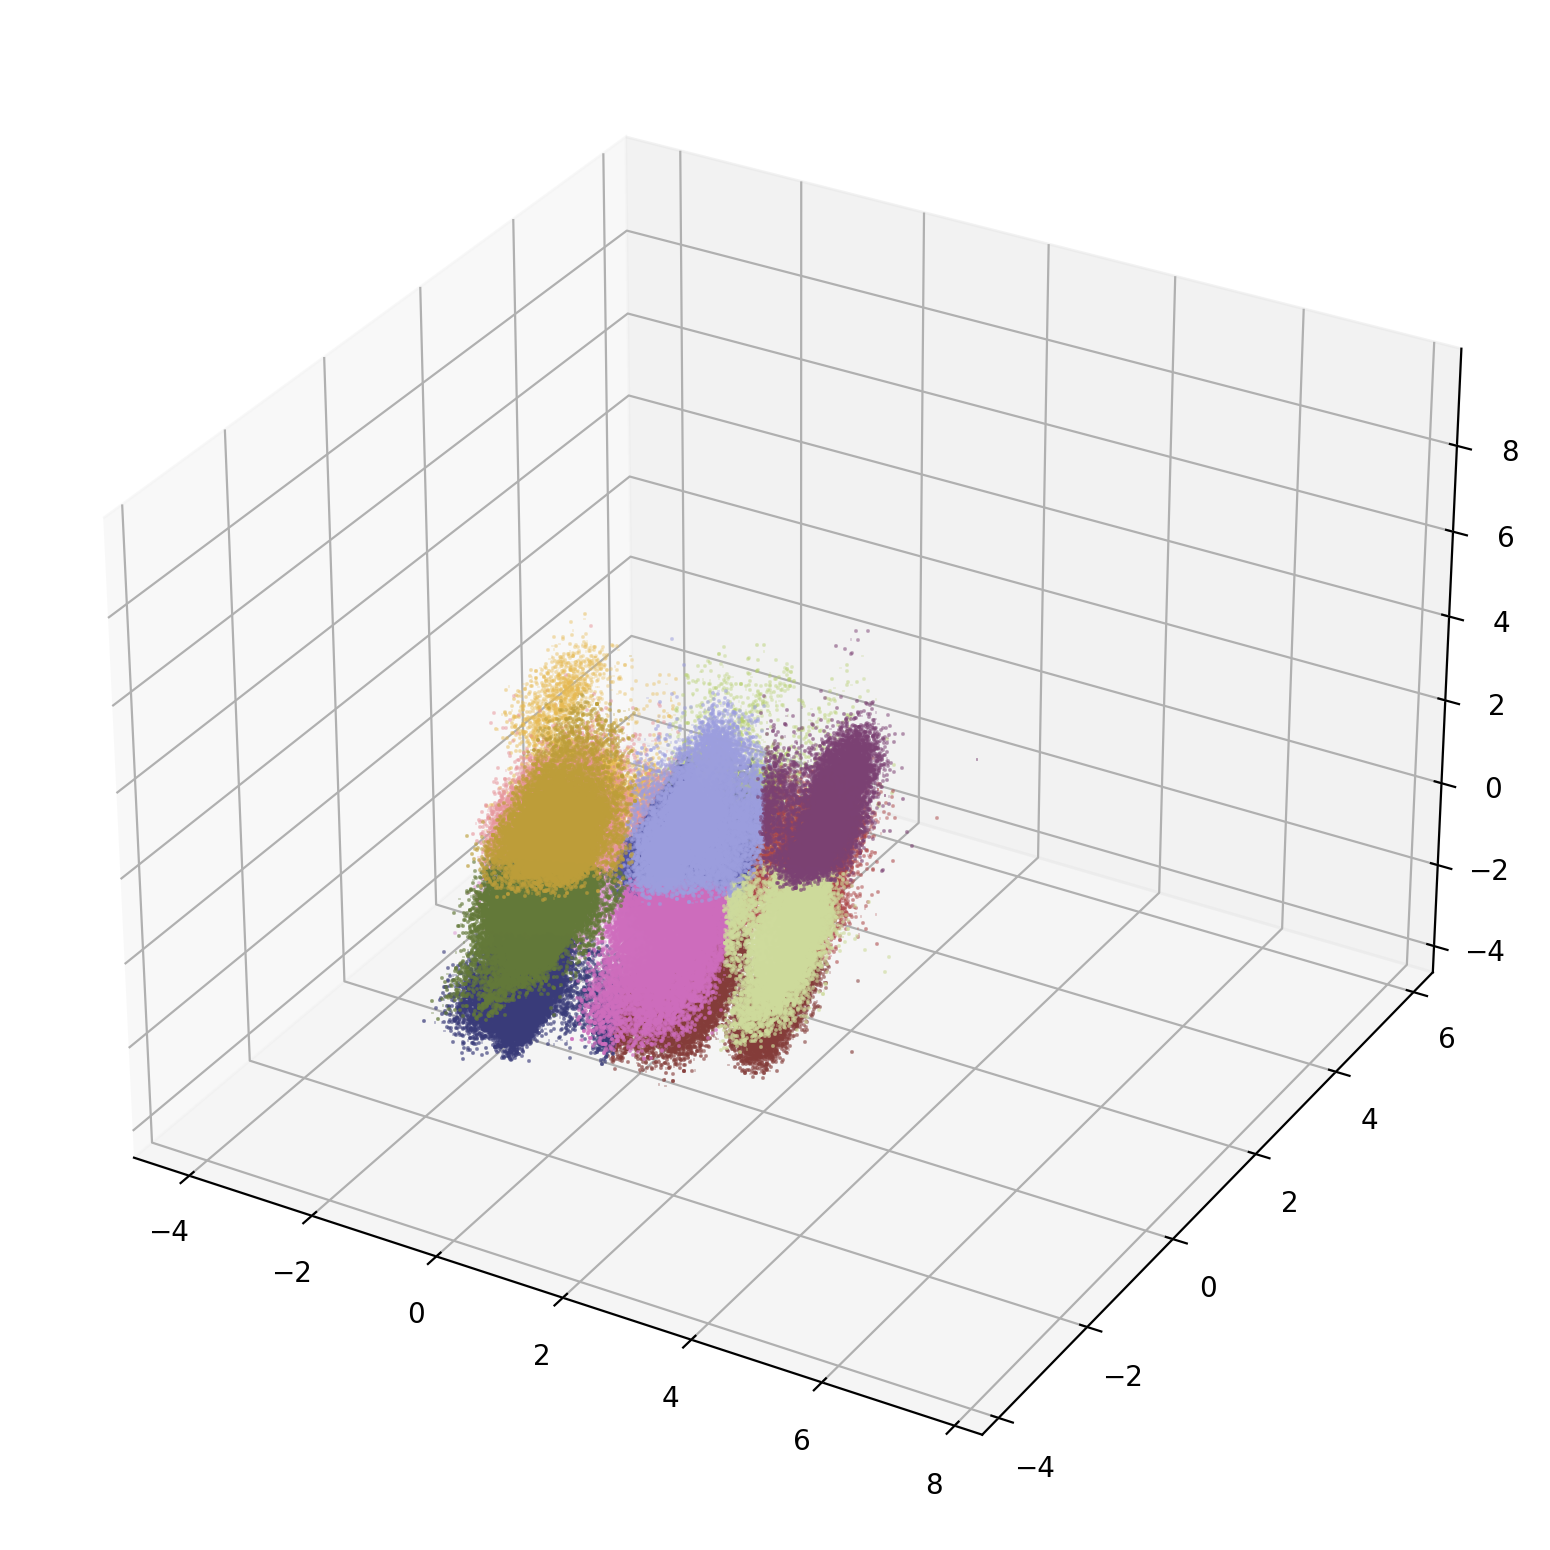

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import figure





fig = plt.figure(figsize=(10, 10), dpi=200)

ax = fig.add_subplot(111, projection='3d')
x = np.array(df_segm_pca_kmeans1['Comp 1'])
y = np.array(df_segm_pca_kmeans1['Comp 2'])
z = np.array(df_segm_pca_kmeans1['Comp 3'])

ax.scatter(x,y,z, marker="s", c=df_segm_pca_kmeans1['Segment K-means pca'], s=0.1, cmap='tab20b')

plt.show()

In [112]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means pca'].map({x: "VCode" + str(x) for x in range(1, 15)})

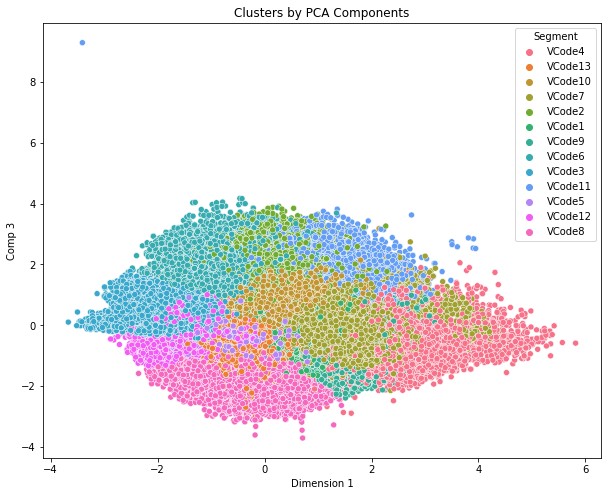

In [113]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Comp 2']
Y_axis = df_segm_pca_kmeans['Comp 3']
plt.figure(figsize = (10, 8))
ax = sns.scatterplot(data = df_segm_pca_kmeans, x = x_axis, y = Y_axis, hue = df_segm_pca_kmeans['Segment'], )
ax.set(xlabel=None)
plt.title('Clusters by PCA Components')
plt.xlabel('Dimension 1')
plt.show()

In [114]:
df_gud

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,1,46,87,52,1,4,3529,80,85032,0,11
1,1,63,81,16,13,4,3529,-1,85032,4,2
2,1,63,28,147,13,4,3529,165,85032,4,2
3,1,63,87,95,13,4,3529,165,85032,4,2
4,1,63,28,167,13,4,3529,74,85032,4,2
...,...,...,...,...,...,...,...,...,...,...,...
292673,75,14,87,24,1,2,1755,158,26002,4,2
292674,75,14,87,95,1,2,1755,10,26002,4,2
292675,75,53,87,38,9,4,1941,78,26002,1,11
292676,75,53,81,215,11,2,1941,30,26002,3,11


In [115]:
df_max_scaled = df_gud.copy()
  
# apply normalization techniques on Column 1
columns = ["Violation Location", "Vehicle Body Type", "Vehicle Make",
           "Violation Time", "Violation County", "Street Name", "Vehicle Color", 
           "Median income (dollars); Estimate; Households", "IssueDate", "VCode"]
for i in columns:
    #print(i)
    df_max_scaled[i] = df_max_scaled[i] / df_max_scaled[i].abs().max()
  
# view normalized data
display(df_max_scaled)

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,0.001242,46,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714
1,0.001242,63,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857
2,0.001242,63,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
3,0.001242,63,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
4,0.001242,63,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,14,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857
292674,0.093168,14,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857
292675,0.093168,53,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714
292676,0.093168,53,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714


In [116]:
df_max_scaled.drop("Violation Code", axis = 1)

,Violation Location,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,0.001242,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714
1,0.001242,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857
2,0.001242,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
3,0.001242,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857
4,0.001242,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857
...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857
292674,0.093168,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857
292675,0.093168,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714
292676,0.093168,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714


In [117]:
df_segm_pca_kmeans = pd.concat([df_max_scaled.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3 :] = ['Comp 1', 'Comp 2', 'Comp 3']
df_segm_pca_kmeans['Segment K-means pca'] = kmeans_pca.labels_

In [118]:
df_segm_pca_kmeans

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode,Comp 1,Comp 2,Comp 3,Segment K-means pca
0,0.001242,46,0.725000,0.197719,0.066667,0.571429,0.829182,0.437158,0.350439,0.000000,0.785714,0.338869,1.818014,-0.627183,4
1,0.001242,63,0.675000,0.060837,0.866667,0.571429,0.829182,-0.005464,0.350439,0.666667,0.142857,-0.529109,0.545410,-1.055522,13
2,0.001242,63,0.233333,0.558935,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.683115,0.559931,-0.772899,13
3,0.001242,63,0.725000,0.361217,0.866667,0.571429,0.829182,0.901639,0.350439,0.666667,0.142857,-0.913999,1.121206,-1.401985,4
4,0.001242,63,0.233333,0.634981,0.866667,0.571429,0.829182,0.404372,0.350439,0.666667,0.142857,-0.468879,0.102517,-0.201110,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292673,0.093168,14,0.725000,0.091255,0.066667,0.285714,0.412359,0.863388,0.107161,0.666667,0.142857,-0.984167,-0.399751,-0.769544,13
292674,0.093168,14,0.725000,0.361217,0.066667,0.285714,0.412359,0.054645,0.107161,0.666667,0.142857,-0.626376,-1.244239,0.402679,3
292675,0.093168,53,0.725000,0.144487,0.600000,0.571429,0.456062,0.426230,0.107161,0.166667,0.785714,1.470554,0.445038,-0.350033,5
292676,0.093168,53,0.675000,0.817490,0.733333,0.285714,0.456062,0.163934,0.107161,0.500000,0.785714,1.837977,-0.864417,0.212281,12


In [119]:
df_segm_pca_kmeans[["Comp 1", "Comp 2", "Comp 3"]]

,Comp 1,Comp 2,Comp 3
0,0.338869,1.818014,-0.627183
1,-0.529109,0.545410,-1.055522
2,-0.683115,0.559931,-0.772899
3,-0.913999,1.121206,-1.401985
4,-0.468879,0.102517,-0.201110
...,...,...,...
292673,-0.984167,-0.399751,-0.769544
292674,-0.626376,-1.244239,0.402679
292675,1.470554,0.445038,-0.350033
292676,1.837977,-0.864417,0.212281


In [120]:
df_segm_pca_kmeans["Violation Time"].unique()

array([0.06666667, 0.86666667, 0.8       , 0.4       , 0.26666667,
       0.66666667, 0.33333333, 0.46666667, 0.2       , 0.53333333,
       0.6       , 0.13333333, 0.        , 0.93333333, 0.73333333,
       1.        ])

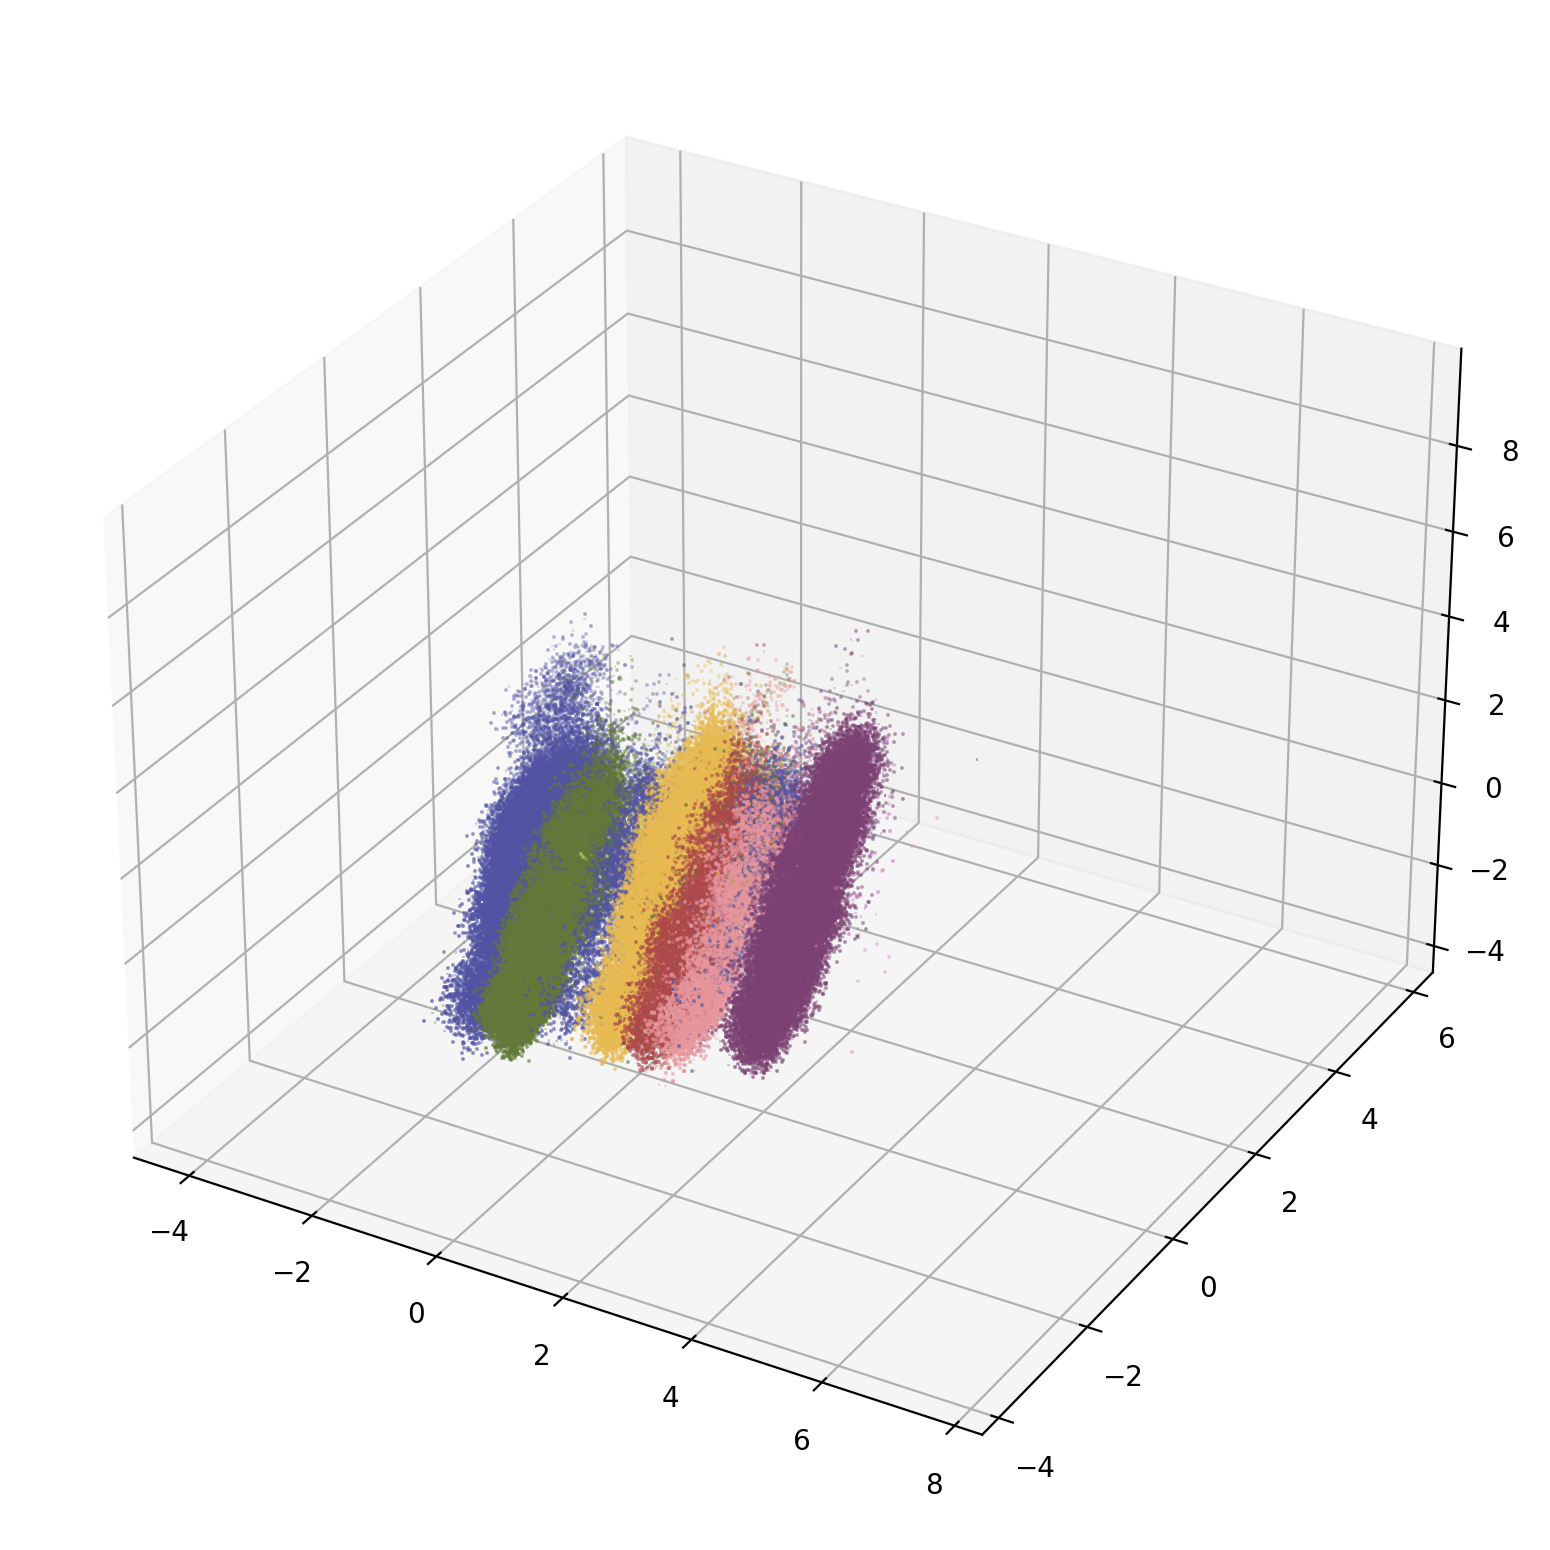

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import figure





fig = plt.figure(figsize=(10, 10), dpi=200)

ax = fig.add_subplot(111, projection='3d')
x = np.array(df_segm_pca_kmeans['Comp 1'])
y = np.array(df_segm_pca_kmeans['Comp 2'])
z = np.array(df_segm_pca_kmeans['Comp 3'])

ax.scatter(x,y,z, marker="s", c=df_segm_pca_kmeans['VCode'], s=0.1, cmap='tab20b')

plt.show()

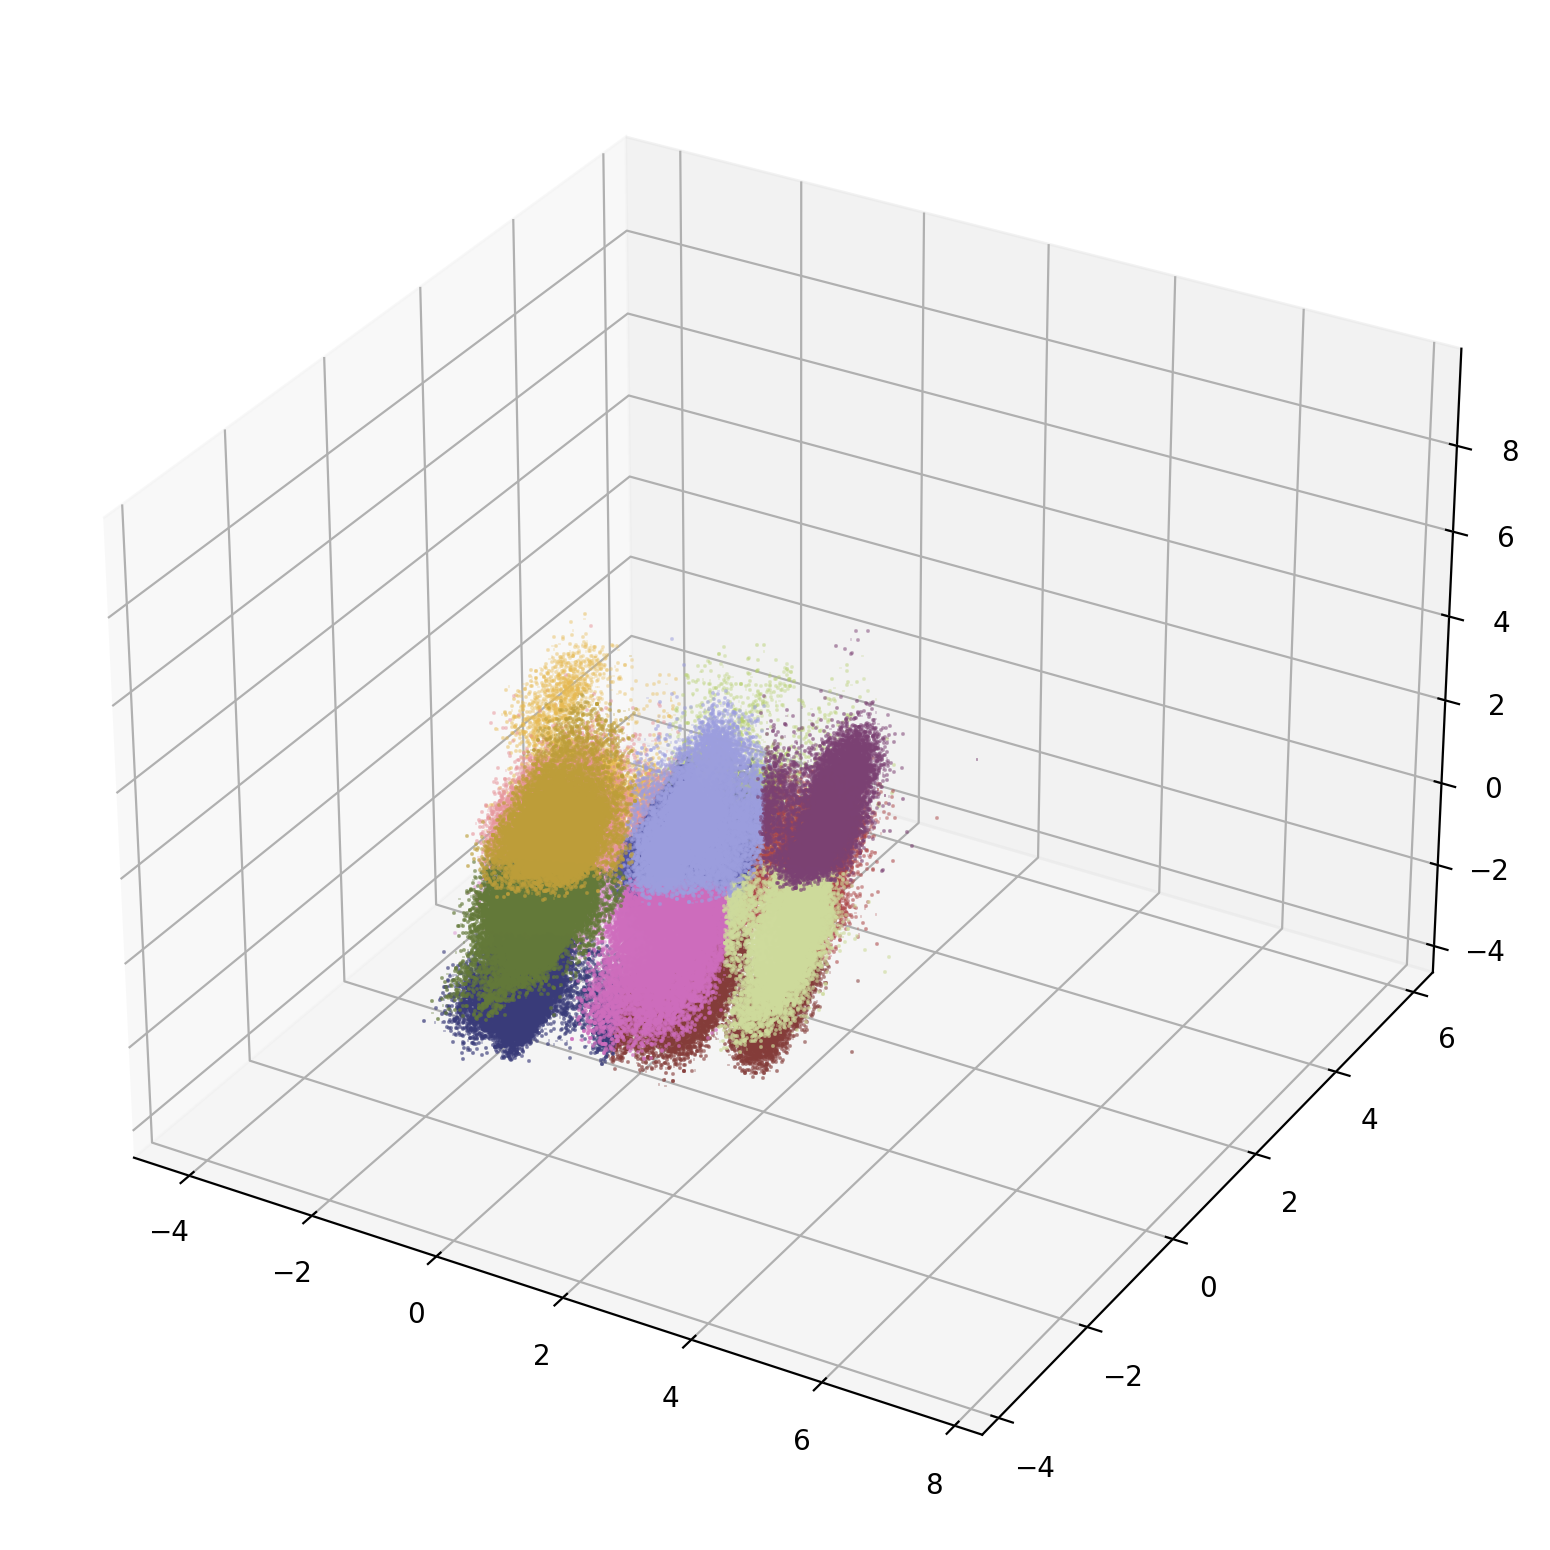

In [122]:
fig = plt.figure(figsize=(10, 10), dpi=200)

ax = fig.add_subplot(111, projection='3d')
x = np.array(df_segm_pca_kmeans['Comp 1'])
y = np.array(df_segm_pca_kmeans['Comp 2'])
z = np.array(df_segm_pca_kmeans['Comp 3'])

ax.scatter(x,y,z, marker="s", c=df_segm_pca_kmeans['Segment K-means pca'], s=0.1, cmap='tab20b')

plt.show()

In [123]:
df_gud["Violation Location"].abs().max()

805

In [124]:
df_gud["Violation Time"].abs().max()

15

In [125]:
df_gud["Violation County"].abs().max()

7

In [126]:
df_gud["Street Name"].abs().max()

4256

In [127]:
input1 = 1
input2 = 2
input3 = 3
input4 = 4

In [128]:
Input_array = np.array([[input1 / 805, input2 / 15, input3 / 7, input4 / 4256]])

In [129]:
Input_array

array([[0.00124224, 0.13333333, 0.42857143, 0.00093985]])

In [130]:
pca = np.array([[ 0.00285211, -0.92271639,  0.35675341, -0.14599089],
       [ 0.01207291,  0.37399345,  0.73673076, -0.56321483],
       [-0.02380599, -0.0933087 , -0.57393259, -0.81322085]])

In [131]:
pca

array([[ 0.00285211, -0.92271639,  0.35675341, -0.14599089],
       [ 0.01207291,  0.37399345,  0.73673076, -0.56321483],
       [-0.02380599, -0.0933087 , -0.57393259, -0.81322085]])

In [132]:
final_input = pca * Input_array

In [196]:
final_input = final_input.sum(axis=1)

In [197]:
comp1 = final_input[0]

In [198]:
comp1

0.029731800082134684

In [206]:
import numpy as np
def PCA_input(input1, input2, input3, input4):
    pca = np.array([[ 0.00285211, -0.92271639,  0.35675341, -0.14599089],
           [ 0.01207291,  0.37399345,  0.73673076, -0.56321483],
           [-0.02380599, -0.0933087 , -0.57393259, -0.81322085]])
    result_input = (np.array([[input1 / 805, input2 / 15, input3 / 7, input4 / 4256]]) * pca).sum(axis=1)
    return result_input

In [209]:
PCA_input(input1, input2, input3, input4)

array([ 0.0297318 ,  0.36509321, -0.25920615])

In [210]:
dic = {"Amsterdam 110" : 1}
dic["Amsterdam 110"]

1